In [ ]:
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=51099a7797d12d249cb05d0c12602fa3373171a01fbc12cbb40e771c16bfaaf1
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
!git clone https://github.com/facebookresearch/VideoPose3D

Cloning into 'VideoPose3D'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 9.53 MiB | 17.97 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
cd VideoPose3D

/content/VideoPose3D


In [ ]:
mkdir checkpoint

In [ ]:
cd checkpoint

/content/VideoPose3D/checkpoint


In [ ]:
!wget https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin

--2024-07-18 02:46:26--  https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.102, 108.157.254.15, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67892577 (65M) [application/octet-stream]
Saving to: ‘pretrained_h36m_detectron_coco.bin’

pretrained_h36m_det 100%[===================>]  64.75M   279MB/s    in 0.2s    

2024-07-18 02:46:26 (279 MB/s) - ‘pretrained_h36m_detectron_coco.bin’ saved [67892577/67892577]



In [ ]:
cd /content

/content


In [ ]:
mkdir inputs

In [ ]:
mkdir results

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-e4v060q2
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-e4v060q2
  Resolved https://github.com/facebookresearch/detectron2.git to commit 2a420edb307c9bdf640f036d3b196bed474b8593
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6172775 sha256=e26ef41177c0f30a938c0d4327c5

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.3 ; cuda:  cu121
detectron2: 0.6


In [ ]:
!mkdir /content/output/

In [ ]:
#resize image to even numbers
!ffmpeg -i /content/man1.jpg -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" /content/resized_man1.jpg


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
# convert resized image to a video and store it in the inputs directory
!ffmpeg -loop 1 -i /content/resized_man1.jpg -c:v libx264 -t 1 -pix_fmt yuv420p /content/inputs/man1_video.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
cd /content/VideoPose3D/inference

/content/VideoPose3D/inference


### Replace infer_video_d2.py with same script in video_pose_3d(videos).ipynb in same repository before running the code below

In [ ]:
!python infer_video_d2.py \
    --cfg COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml \
    --output-dir /content/output/ \
    --image-ext mp4 \
    /content/inputs

[07/18 03:20:42 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl ...
Processing /content/inputs/man1_video.mp4
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libp

In [ ]:
cd /content/VideoPose3D/data

/content/VideoPose3D/data


In [ ]:
!python prepare_data_2d_custom.py -i /content/output -o myvideos


Parsing 2D detections from /content/output
Processing /content/output/man1_video.mp4.npz
25 total frames processed
0 frames were interpolated
----------
Saving...
Done.


In [ ]:
cd /content/VideoPose3D

/content/VideoPose3D


In [ ]:
!python run.py -d custom -k myvideos -arc 3,3,3,3,3 -c checkpoint --evaluate pretrained_h36m_detectron_coco.bin --render --viz-subject man1_video.mp4 --viz-action custom --viz-camera 0 --viz-video /content/inputs/man1_video.mp4 --viz-output /content/results/man1_3d.mp4 --viz-size 6

Namespace(dataset='custom', keypoints='myvideos', subjects_train='S1,S5,S6,S7,S8', subjects_test='S9,S11', subjects_unlabeled='', actions='*', checkpoint='checkpoint', checkpoint_frequency=10, resume='', evaluate='pretrained_h36m_detectron_coco.bin', render=True, by_subject=False, export_training_curves=False, stride=1, epochs=60, batch_size=1024, dropout=0.25, learning_rate=0.001, lr_decay=0.95, data_augmentation=True, test_time_augmentation=True, architecture='3,3,3,3,3', causal=False, channels=1024, subset=1, downsample=1, warmup=1, no_eval=False, dense=False, disable_optimizations=False, linear_projection=False, bone_length_term=True, no_proj=False, viz_subject='man1_video.mp4', viz_action='custom', viz_camera=0, viz_video='/content/inputs/man1_video.mp4', viz_skip=0, viz_output='man1_3d.mp4', viz_export=None, viz_bitrate=3000, viz_no_ground_truth=False, viz_limit=-1, viz_downsample=1, viz_size=6)
Loading dataset...
Preparing data...
Loading 2D detections...
INFO: Receptive field: 

In [ ]:
#extract 1st frame from output video
!ffmpeg -i man1_3d.mp4 -vf "select=eq(n\,0)" -q:v 3 /content/results/man1_3d_frame.jpg


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


###INPUT IMAGE

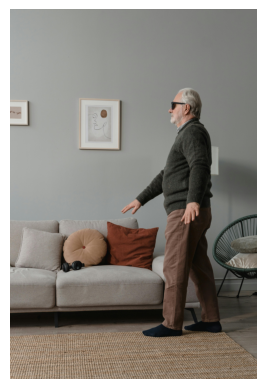

In [ ]:
img = mpimg.imread('/content/man1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()


###OUTPUT IMAGE

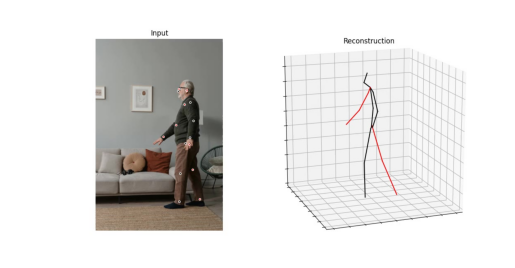

In [ ]:
img = mpimg.imread('/content/results/man1_3d_frame.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()